In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
from google.colab import files
import io
import os

file_name = "Housing.csv"
df = None

if file_name in os.listdir('.'):
    df = pd.read_csv(file_name)
    print(f"Successfully loaded '{file_name}' from the current directory.")
else:
    print(f"File '{file_name}' not found in the current directory. Attempting to prompt for upload.")
    try:
        uploaded = files.upload()
        if file_name in uploaded:
            print(f"Loading '{file_name}' from uploaded content...")
            df = pd.read_csv(io.BytesIO(uploaded[file_name]))
            print(f"Successfully loaded '{file_name}'.")
        else:
            print(f"The file '{file_name}' was not selected or uploaded. Please ensure you upload the correct file.")
    except Exception as e:
        print(f"An error occurred during file upload: {e}")

if df is not None:
    df.head()

Successfully loaded 'Housing.csv' from the current directory.


In [101]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'housing-price-prediction' dataset.
Path to dataset files: /kaggle/input/housing-price-prediction


In [102]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [103]:
df.isnull().sum()   # Check missing values

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [104]:
df = df.dropna()

In [105]:
X = df.drop('Price', axis=1)
y = df['Price']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)

In [109]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 0.5332001304956553
MSE: 0.5558915986952444
R2 Score: 0.5757877060324508


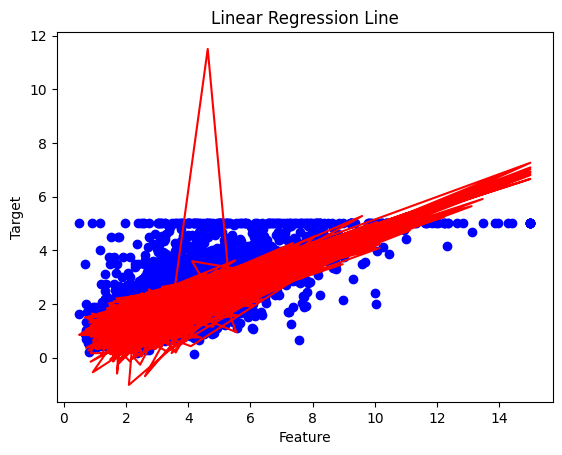

In [110]:
plt.scatter(X_test.iloc[:,0], y_test, color='blue')
plt.plot(X_test.iloc[:,0], y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Line")
plt.show()

In [111]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -37.02327770606409
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


Dataset Shape: (20640, 9)

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

Model Evaluation:
MAE: 0.5332001304956553
MSE: 0.5558915986952444
R2 Score: 0.5757877060324508

Intercept: -37.02327770606409
Coefficients:
MedInc: 0.44867490966571666
HouseAge: 0.009724257517904806
AveRooms: -0.12332334282795815
AveBedrms: 0.7831449067929722
Population: -2.029620580100075e-06
AveOccup: -0.003526318487134238
Latitude: -0.4197924865883604
Longitude: -0.433708064963987


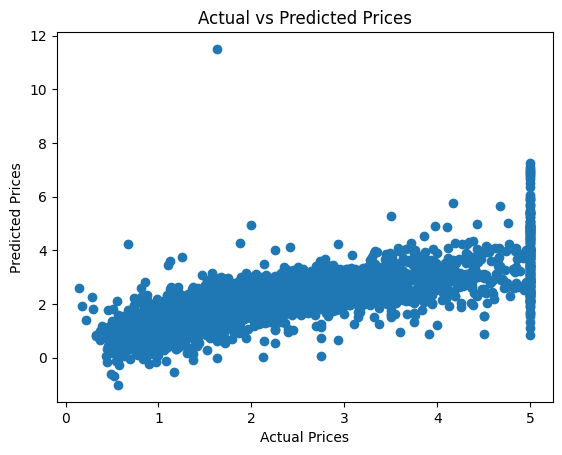

In [112]:
# ==========================================
# Task 3: Linear Regression
# AI & ML Internship - Elevate Labs
# ==========================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Step 2: Load Dataset (California Housing Dataset)
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

print("Dataset Shape:", df.shape)
df.head()

# Step 3: Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Step 4: Define Features and Target
X = df.drop('Price', axis=1)
y = df['Price']

# Step 5: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

# Step 9: Print Coefficients
print("\nIntercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Step 10: Simple Visualization (Actual vs Predicted)
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

### Dataset Import and Preprocessing Steps

1.  **Libraries Import**: Essential libraries for data manipulation, modeling, and visualization (`pandas`, `numpy`, `matplotlib.pyplot`, `sklearn.model_selection`, `sklearn.linear_model`, `sklearn.metrics`) were imported.
2.  **Dataset Loading**: The California Housing dataset was loaded using `fetch_california_housing` from `sklearn.datasets`. The features were then put into a Pandas DataFrame `df` with column names, and the target variable 'Price' was added as a new column.
3.  **Missing Values Check**: The dataset was checked for any missing values using `df.isnull().sum()`. The output showed no missing values, so `df.dropna()` was executed but had no effect.
4.  **Feature and Target Definition**: The dataset was split into features (`X`) by dropping the 'Price' column, and the target variable (`y`) which is the 'Price' column itself.
5.  **Data Splitting**: The data was divided into training and testing sets using `train_test_split`, with 80% of the data allocated for training and 20% for testing. A `random_state` was set for reproducibility.